# Augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
j=1
for j in range (1,124):
    img = load_img('Face detect/Parshv Faces/patel ('+str(j)+').jpg')  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='Augumented dataset/parshv', save_prefix='parshv', save_format='jpeg'):
        i += 1
        if i > 20:
            break  # otherwise the generator would loop indefinitely



In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import numpy as np
import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train_path='/content/drive/My Drive/Sem 7/Minior/meet parshv/Augumented dataset/train'
test_path='/content/drive/My Drive/Sem 7/Minior/meet parshv/Augumented dataset/test'
valid_path='/content/drive/My Drive/Sem 7/Minior/meet parshv/Augumented dataset/valid'

In [49]:
train_batches=ImageDataGenerator().flow_from_directory(train_path, target_size=(32,32),classes=['meet','parshv'], batch_size=60)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path, target_size=(32,32), classes=['meet','parshv'], batch_size=20)
test_batches=ImageDataGenerator().flow_from_directory(test_path, target_size=(32,32),classes=['meet','parshv'] , batch_size=20,shuffle=False)

Found 2768 images belonging to 2 classes.
Found 916 images belonging to 2 classes.
Found 907 images belonging to 2 classes.


In [0]:
#plot images with labels within jupyter notebook 
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type (ims[0]) is np.ndarray:
        ims=np.array(ims).astype (np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose ((2,2,3,1))
    f=plt.figure (figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    
    for i in range (len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
img, labels=next(train_batches)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


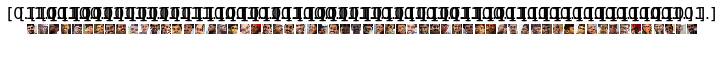

In [0]:
plots(img,titles=labels)


In [0]:
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
#      Conv2D(64,(2,2),activation = 'relu'),
# #     Conv2D(128,(3,3),activation = 'relu'),
#     Flatten(),
#     Dense(2, activation='softmax'),
#  ])


# model = Sequential([
#     Dense(1,input_shape=(32,32,3),activation='relu'),
# #     Conv2D(16, (3, 3), activation='relu'),
#     Conv2D(32, (3, 3), activation='relu',input_shape=(32,32,3)),
#      Conv2D(64,(3,3),activation = 'relu'),
#     Dropout(0.7),
#      Conv2D(128,(3,3),activation = 'relu'),
#     Flatten(),
#     Dense(2, activation='softmax'),
#  ])

model = Sequential([
#     Dense(1,input_shape=(32,32,3),activation='relu'),
#     Conv2D(16, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu',input_shape=(32,32,3)),
    Conv2D(64,(3,3),activation = 'relu'),
   MaxPooling2D(pool_size=(2, 2)),
     Conv2D(128,(3,3),activation = 'relu'),
 MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),
    Flatten(),
    Dense(2, activation='softmax'),
 ])

In [0]:
# model.compile(Adam(lr=.00001), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(Adam(lr=.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
model.fit_generator(train_batches, steps_per_epoch=38, 
                    validation_data=valid_batches, validation_steps=38, epochs=100, verbose=2)

Epoch 1/100
 - 5s - loss: 0.1231 - acc: 0.9552 - val_loss: 0.1835 - val_acc: 0.9329
Epoch 2/100
 - 4s - loss: 0.0660 - acc: 0.9759 - val_loss: 0.1679 - val_acc: 0.9352
Epoch 3/100
 - 4s - loss: 0.0689 - acc: 0.9671 - val_loss: 0.3044 - val_acc: 0.8968
Epoch 4/100
 - 4s - loss: 0.1006 - acc: 0.9604 - val_loss: 0.1611 - val_acc: 0.9444
Epoch 5/100
 - 5s - loss: 0.0477 - acc: 0.9864 - val_loss: 0.1643 - val_acc: 0.9378
Epoch 6/100
 - 4s - loss: 0.0837 - acc: 0.9649 - val_loss: 0.1371 - val_acc: 0.9487
Epoch 7/100
 - 5s - loss: 0.0521 - acc: 0.9794 - val_loss: 0.1524 - val_acc: 0.9365
Epoch 8/100
 - 4s - loss: 0.0299 - acc: 0.9908 - val_loss: 0.1517 - val_acc: 0.9511
Epoch 9/100
 - 4s - loss: 0.0304 - acc: 0.9912 - val_loss: 0.1095 - val_acc: 0.9656
Epoch 10/100
 - 4s - loss: 0.0229 - acc: 0.9934 - val_loss: 0.1475 - val_acc: 0.9431
Epoch 11/100
 - 4s - loss: 0.0150 - acc: 0.9969 - val_loss: 0.1384 - val_acc: 0.9563
Epoch 12/100
 - 5s - loss: 0.0150 - acc: 0.9969 - val_loss: 0.1533 - val_a

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


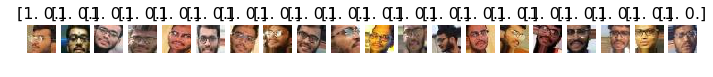

In [56]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [57]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.], dtype=float32)

In [0]:
predictions = model.predict_generator(test_batches, steps=45.35, verbose=2)

In [59]:
predictions

array([[1.0000000e+00, 1.2066659e-10],
       [9.9880469e-01, 1.1952593e-03],
       [9.9998534e-01, 1.4616669e-05],
       ...,
       [9.5089842e-03, 9.9049103e-01],
       [4.9438023e-07, 9.9999952e-01],
       [1.6872708e-06, 9.9999833e-01]], dtype=float32)

In [0]:
rounded_predictions=np.argmax(predictions,axis=1)

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)             

In [0]:
model.save('My_model_V4.h5')

In [0]:
cm=confusion_matrix(test_batches.classes,rounded_predictions)

In [64]:
from sklearn.metrics import classification_report
print('Classification Report')
target_names = ['meet', 'parshv']
print(classification_report(test_batches.classes, rounded_predictions, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

        meet       0.98      0.98      0.98       451
      parshv       0.98      0.98      0.98       456

    accuracy                           0.98       907
   macro avg       0.98      0.98      0.98       907
weighted avg       0.98      0.98      0.98       907



In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import itertools
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

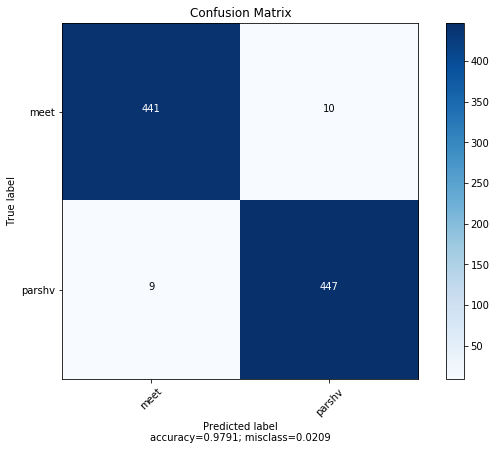

In [66]:
plot_confusion_matrix(cm           = cm, 
                      normalize    = False,
                      target_names = target_names,
                      title        = "Confusion Matrix")

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 100354    
Total params: 119,746
Trainable params: 119,746
Non-trainable params: 0
_________________________________________________________________


In [0]:
# model.save('My_model.h5')
new_test_path = os.path.join(data_dir, 'new_test')
new_test_batches=ImageDataGenerator().flow_from_directory(new_test_path, target_size=(32,32),classes=['Amish','Megh'], batch_size=24)


In [0]:
test_imgs, test_labels = next(new_test_batches)
plots(test_imgs, titles=test_labels)

In [0]:
test_labels = test_labels[:, 0]
test_labels